In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/sabah0312/ml-datasets/refs/heads/main/toydata-truncated.txt'
df = pd.read_csv(url, sep="\t")

df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [2]:
df[['x1','x2']].values

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [3]:
X = df[['x1','x2']].values
y = df['label'].values

## **Perceptron in torch**

In [4]:
import torch

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype= torch.float32)

In [5]:
print(f" train_x {X.shape}")
print(f" train_y {y.shape}")

 train_x torch.Size([20, 2])
 train_y torch.Size([20])


In [32]:
class Perceptron:
  def __init__(self, num_features):
    self.w = torch.zeros(num_features, 1)
    self.bias = torch.zeros(1)

  def forward(self, x):
    z = self.w.T @ x + self.bias

    if z > 0.0:
      prediction = 1
    else:
      prediction = 0
    return prediction

  def update(self, x, y_true):
    prediction = self.forward(x)
    error = y_true - prediction
    # print(f"error: {error}")

    self.bias += error
    # print(f"w: {self.w}")
    # print(f"bias: {self.bias}")
    # print(f"x: {x}")
    # print(f"x.view(-1,1): {x.view(-1,1)}")
    self.w += error * x.view(-1,1)
    # print(f"updated w: {self.w}")
    return error

In [33]:
PPn = Perceptron(2)
print(f"initial weights: {PPn.w}")
print(f"initial bias : {PPn.bias}")


initial weights: tensor([[0.],
        [0.]])
initial bias : tensor([0.])


In [23]:
PPn.update(X[10],1)

error: 1
w: tensor([[0.],
        [0.]])
bias: tensor([1.])
x: tensor([3.8800, 0.6500])
x.view(-1,1): tensor([[3.8800],
        [0.6500]])
updated w: tensor([[3.8800],
        [0.6500]])


1

## Visualization
Ignore the code

In [26]:
import matplotlib.pyplot as plt
def plot_decision_boundary(model, X, y, x_range=(-5, 5), y_range=(-5, 5)):
    # Extract weights and bias
    w1, w2 = model.w[0].item(), model.w[1].item()
    b = model.bias.item()

    # Check if weights are zero (untrained model)
    if abs(w1) < 1e-10 and abs(w2) < 1e-10:
        print("Warning: Model weights are zero. No decision boundary to plot.")
        # Just plot the data points
        plt.plot(X[y == 0, 0], X[y == 0, 1], marker="D", markersize=10,
                 linestyle="", label="Class 0")
        plt.plot(X[y == 1, 0], X[y == 1, 1], marker="^", markersize=13,
                 linestyle="", label="Class 1")
        plt.legend(loc=2)
        plt.xlim(x_range)
        plt.ylim(y_range)
        plt.xlabel("Feature $x_1$", fontsize=12)
        plt.ylabel("Feature $x_2$", fontsize=12)
        plt.grid()
        plt.show()
        return

    # Calculate boundary line endpoints
    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    # Rest of your plotting code...
    plt.plot(X[y == 0, 0], X[y == 0, 1], marker="D", markersize=10,
             linestyle="", label="Class 0")
    plt.plot(X[y == 1, 0], X[y == 1, 1], marker="^", markersize=13,
             linestyle="", label="Class 1")
    plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k", label="Decision Boundary")

    plt.legend(loc=2)
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.xlabel("Feature $x_1$", fontsize=12)
    plt.ylabel("Feature $x_2$", fontsize=12)
    plt.grid()
    plt.show()

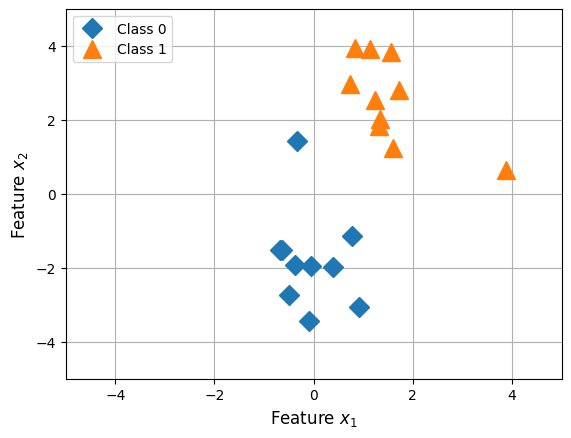

In [29]:
plot_decision_boundary(PPn, X, y)

In [76]:
i = 0

1


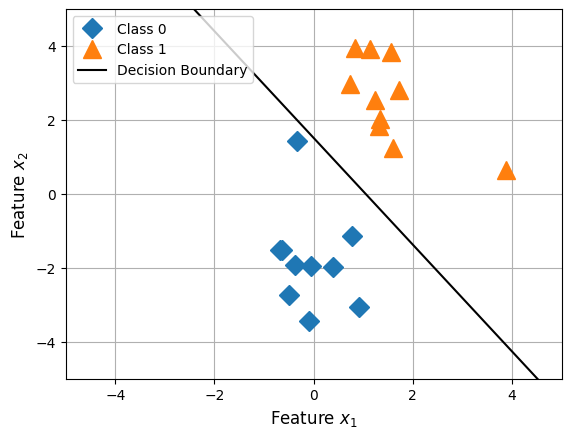

In [78]:
print(i)
PPn.update(X[i], y[i])
i = i + 1
plot_decision_boundary(PPn, X, y)


In [79]:
PPn = Perceptron(2)

error_count: 0.0


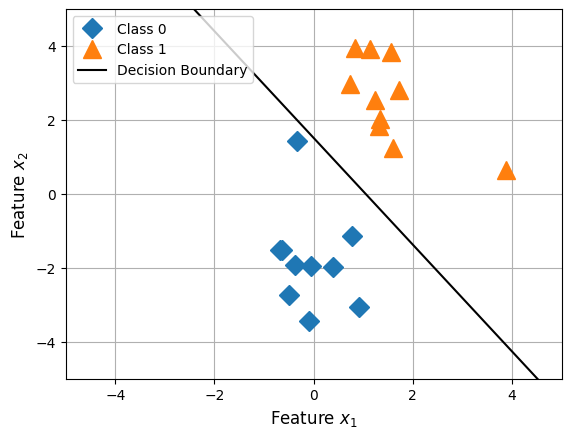

In [85]:

error_count = 0
for i in range(len(X)):
  error = PPn.update(X[i], y[i])
  error_count += abs(error)
print(f"error_count: {error_count}")
plot_decision_boundary(PPn, X, y)

In [ ]:
epoch_no = 5
for epoch in range(epoch_no):
  error_count = 0
  for i in range(len(X)):
    error = PPn.update(X[i], y[i])
    error_count += abs(error)
  print(f"error_count: {error_count}")
  #print(f" weights: {PPn.w}")
  #print(f" bias : {PPn.bias}")

# Intialize weights with randoms



In [86]:
class Perceptron:
  def __init__(self, num_features):
    self.w = torch.randn(num_features, 1)
    self.bias = torch.randn(1)

  def forward(self, x):
    z = self.w.T @ x + self.bias

    if z > 0.0:
      prediction = 1
    else:
      prediction = 0
    return prediction

  def update(self, x, y_true):
    prediction = self.forward(x)
    error = y_true - prediction

    self.bias += error
    self.w += error * x.view(-1,1)
    return error

In [87]:
PPn = Perceptron(2)
print(f"initial weights: {PPn.w}")
print(f"initial bias : {PPn.bias}")
epoch_no = 5
for epoch in range(epoch_no):
  error_count = 0
  for i in range(len(X)):
    error = PPn.update(X[i], y[i])
    error_count += abs(error)
  print(f"error_count: {error_count}")

initial weights: tensor([[-0.3033],
        [ 0.3119]])
initial bias : tensor([1.6308])
error_count: 4.0
error_count: 2.0
error_count: 0.0
error_count: 0.0
error_count: 0.0
